# Best Neighborhood in Pittsburgh

## Introduction

We aim to find the best neighborhood in Pittsburgh. Our approach involves analyzing and combining data from three different sources: Police incidents in the last 30 days, Number of playing fields, and school data. We assign each dataset a weight and use them to determine the overall ranking of the neighborhoods. 

We selected the three datasets based on their relevance and importance in determining the livability of a neighborhood. We assigned weights to each dataset based on their significance in our ranking process.Some alternatives we considered were in our weighting process for the dataset, it is hard to come up with a logical weighting as people value these things differently. Also looking at crimes rates over a larger period than 30 days.


## The Metric

Our metric is a combination of three weighted datasets: Police incidents in the last 30 days, Number of playing fields, and school data. Each dataset provides insights into different aspects of a neighborhood's livability, and we assign them weights based on their relative importance.

The first dataset we use is police incidents in the last 30 days. This dataset provides information on the number and type of crimes reported in each neighborhood. We believe this is an essential factor in determining the safety and security of a neighborhood.

The second dataset is the number of playing fields in each neighborhood. We believe that access to recreational facilities is crucial in promoting physical activity and healthy lifestyles. Therefore, we use this dataset to measure the availability of outdoor spaces for sports and other activities.

The third dataset we use is school data. This dataset provides information on the quality of education in each neighborhood. We believe that access to quality education is essential for a neighborhood's long-term growth and prosperity.


## The Best Neighborhood

### Police Incident Data
This dataset is aimed at evaulating the safety of the neighborhoods

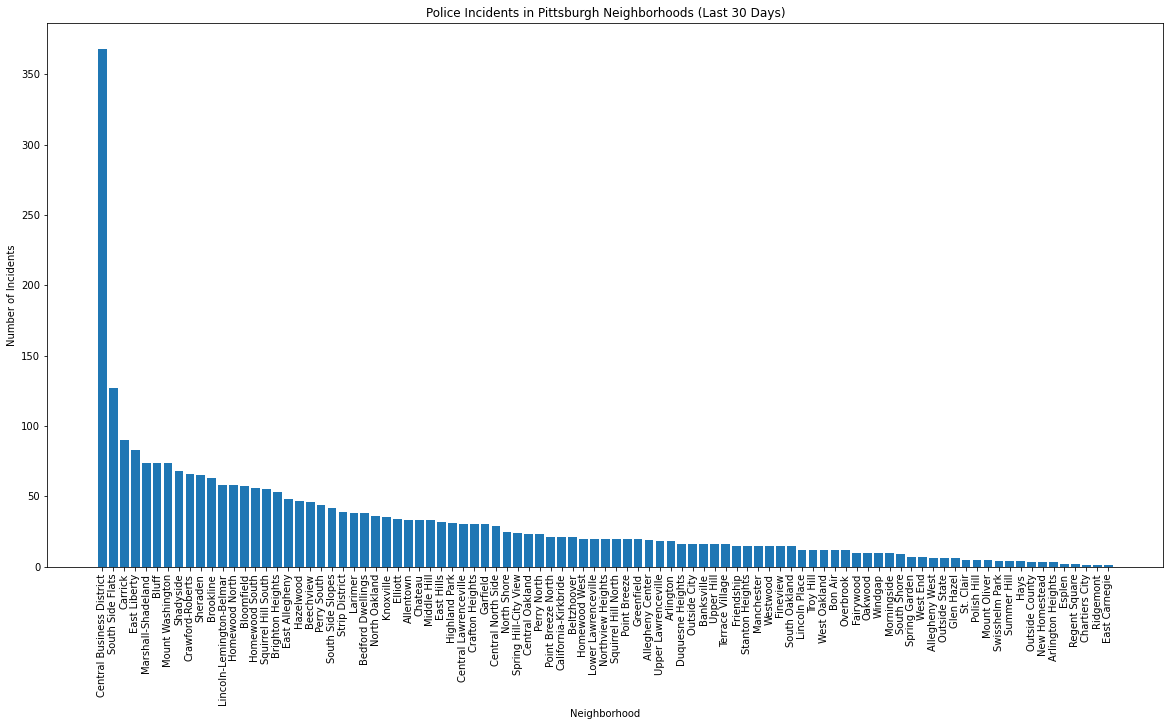

Chartiers City is the best neighborhood base on police data


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os
import random
# Load the police incidents data
police_data = pd.read_csv('police_incidents.csv')

# Calculate the number of incidents in each neighborhood
neighborhood_counts = police_data['INCIDENTNEIGHBORHOOD'].value_counts()

# Create a bar chart of the neighborhood incident counts
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(neighborhood_counts.index, neighborhood_counts.values)

# Set the chart title and axis labels
ax.set_title('Police Incidents in Pittsburgh Neighborhoods (Last 30 Days)')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of Incidents')


# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

neighborhood_counts = police_data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='count')

# Sort neighborhoods by the number of incidents in ascending order
neighborhood_counts = neighborhood_counts.sort_values('count')

# Get the neighborhood with the lowest number of incidents
best_neighborhood = neighborhood_counts.iloc[0]['INCIDENTNEIGHBORHOOD']
print(best_neighborhood + ' is the best neighborhood base on police data')

### School Data
This dataset is used to evaulate the quality of education as a smarter neighborhood is better

In [18]:
# Data as a string
data_string = """
Neighborhood	Gifted	Other IEP	Not IEP or Gifted	Total Enrollment K-12
Allegheny Center, Allegheny West, California Kirkbride, Chateau, Manchester	12	89	250	351
Allentown, Beltzhoover	15	148	366	529
Banksville, Ridgemont, Oakwood, East Carnegie, Westwood	24	70	436	530
Beechview	44	166	540	750
Bloomfield, Friendship	43	50	198	291
Bluff, Central, North, South, West Oakland	11	36	152	199
Brighton Heights	39	130	397	566
Brookline	119	203	790	1112
Carrick	60	265	887	1212
Central Northside	18	21	95	134
Central, Upper Lawrenceville	32	49	154	235
Chartiers City, Esplen, Fairywood, Windgap	12	66	162	240
Crafton Heights	12	98	393	503
Duquesne Heights, Mount Washington	28	124	335	487
East Allegheny, Spring Garden, Troy Hill	18	55	199	272
East Hills, Wilkinsburg Borough	26	198	603	827
East Liberty, Larimer	37	168	503	708
Garfield	11	124	352	487
Greenfield	85	59	327	471
Hays, Lincoln Place, New Homestead	27	61	255	343
Hazelwood, Glen Hazel	30	185	420	635
Highland Park	83	45	254	382
Hill District	25	273	838	1136
Homewood North, South, West	27	274	789	1090
Knoxville, Bon Air	21	190	443	654
Lincoln-Lemington-Belmar	17	107	356	480
Lower Lawrenceville, Polish Hill, Strip District	11	22	102	135
Marshall-Shadeland	12	107	317	436
Morningside	16	28	121	165
Mt. Oliver Borough, Mt. Oliver, Arlington, Arlington Heights, St. Clair	20	217	530	767
Overbrook	17	55	192	264
Perry North	33	66	257	356
Perry South, Fineview	18	133	348	499
Point Breeze	97	32	177	306
Point Breeze North	19	23	87	129
Shadyside	26	20	154	200
Sheraden	14	194	428	636
South Side Flats	15	24	70	109
South Side Slopes	13	48	116	177
Spring Hill, Summer Hill, Northview Heights	13	171	589	773
Squirrel Hill North	108	20	200	328
Squirrel Hill South, Regent Square, Swisshelm Park	242	69	440	751
Stanton Heights	32	45	230	307
West End, Elliott	13	69	162	244
"""

# Convert the data_string into a list of dictionaries
data_lines = data_string.strip().split("\n")
keys = data_lines[0].split("\t")

data_list = []
for line in data_lines[1:]:
    values = line.split("\t")
    data_list.append(dict(zip(keys, values)))

# Create the bar graph
fig, ax = plt.subplots(figsize=(20, 10))
neighborhoods = [item["Neighborhood"] for item in data_list]
gifted = [int(item["Gifted"]) for item in data_list]
other_iep = [int(item["Other IEP"]) for item in data_list]
not_iep_or_gifted = [int(item["Not IEP or Gifted"]) for item in data_list]

x = range(len(neighborhoods))
width = 0.3

ax.bar(x, gifted, width, label="Gifted")
ax.bar([i + width for i in x], other_iep, width, label="Other IEP")
ax.bar([i + 2 * width for i in x], not_iep_or_gifted, width, label="Not IEP or Gifted")

ax.set_xticks([i + width for i in x])
ax.set_xticklabels(neighborhoods, rotation=90)
ax.set_ylabel("Number of Students")
ax.set_title("Enrollment by Category in Each Neighborhood")
ax.legend()

plt.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

### Playing Field Data
This part of the metric will gauge how many recreational areas are avaliable in the neighborhood

#### Heat Map of Playing Fields
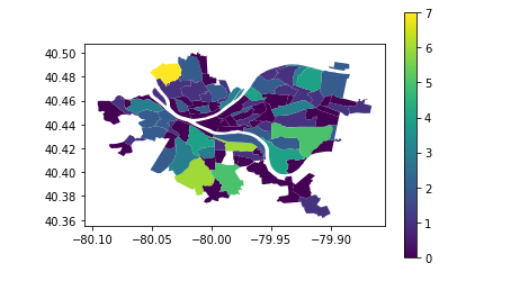

#### Bar graph of Number of Playing Fields in each Neighborhood
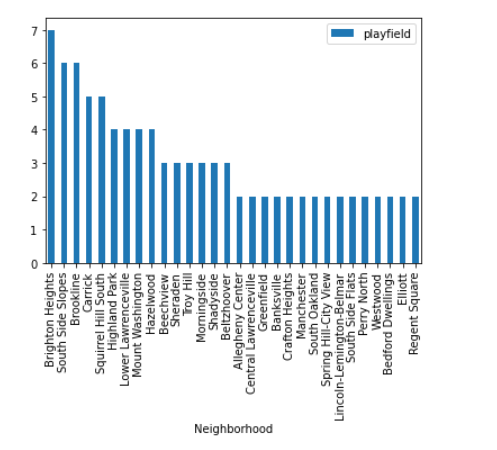

In [4]:
#Let's get start by importing library
!pip install geopandas
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 330.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 5.4 MB/s eta 0:00:00a 0:00:01m
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


POLYGON ((-79.905600781874 40.4552199607547, -79.9055338178729 40.4551913489724, -79.9054813177469 40.4552525789319, -79.9050342903863 40.4550699757495, -79.9045532900137 40.4548749760093, -79.9036842891784 40.4545409762304, -79.9032332890956 40.4543679757969, -79.9027692889252 40.4541999758805, -79.9013772884821 40.4536959759952, -79.9009142884427 40.4535289762417, -79.900658288741 40.4534349758325, -79.8998902881671 40.4531529758057, -79.8996342878983 40.4530599758356, -79.8988232873674 40.4527269758697, -79.8973892879663 40.4521739755158, -79.8966742867855 40.451891976133, -79.8959612868449 40.451614975535, -79.8948292862002 40.4511879753212, -79.8945862870612 40.451080975243, -79.8938572861907 40.4507589757396, -79.8936142865998 40.4506529754229, -79.8934692865889 40.4505569754489, -79.8927069299729 40.4503989460638, -79.8923759496974 40.4503512729333, -79.8923758461076 40.450351241522, -79.8924840065461 40.4498397708806, -79.8924876405223 40.4498226080585, -79.8931823036783 40.446

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823


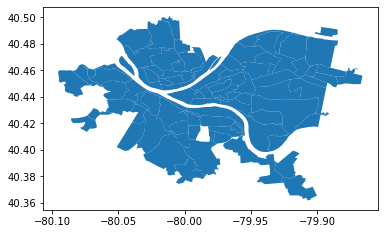

In [5]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
neighborhood=gpd.read_file('map.shp')

print(neighborhood["geometry"][0])
neighborhood.plot()
nb = pd.read_csv("map.csv")
nb.head(2)


In [6]:
pf=pd.read_csv("playfield.csv")


---
### Since map.shp doesn't contain names of neighborhood, I get this information from map.csv and combine it with other information in playing field data frame.

In [7]:
n_data = pd.DataFrame()
n_data["Neighborhood"]=nb["hood"]
n_data["Geometry"] = neighborhood["geometry"]
n_data["playfield"]=0
n_data.sample(10)

,Neighborhood,Geometry,playfield
11,East Liberty,"POLYGON ((-79.91580 40.46081, -79.91577 40.460...",0
17,Homewood North,"POLYGON ((-79.89446 40.46255, -79.89446 40.462...",0
40,Overbrook,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",0
64,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",0
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",0
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",0
44,East Allegheny,"POLYGON ((-79.99288 40.45745, -79.99286 40.457...",0
57,West End,"POLYGON ((-80.02821 40.44427, -80.02821 40.444...",0
81,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0
77,West Oakland,"POLYGON ((-79.95744 40.44252, -79.95744 40.442...",0


In [8]:
from shapely.geometry import Point
cnt=0
for i,cur in pf.iterrows():
  
    pt=Point(cur["longitude"],cur["latitude"])
    found=False
    for j,nb in n_data.iterrows():
        if(nb["Geometry"].contains(pt)): 
            cnt+=1
            n_data.at[j,"playfield"]+=1
            
# print(neighborhood.head())
# neighborhood.plot(column='a',legend=True)
print(len(neighborhood))
n_data.sample(10)
# print(cnt)
# cn1

90


,Neighborhood,Geometry,playfield
89,Fineview,"POLYGON ((-80.00198 40.46814, -80.00129 40.467...",1
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",4
16,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",0
42,Homewood West,"POLYGON ((-79.90112 40.45850, -79.90113 40.458...",0
55,East Hills,"POLYGON ((-79.87523 40.45979, -79.87448 40.459...",1
36,Highland Park,"POLYGON ((-79.91356 40.48644, -79.91354 40.486...",4
27,Greenfield,"POLYGON ((-79.92673 40.41886, -79.92692 40.418...",2
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",5
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",1
68,California-Kirkbride,"POLYGON ((-80.01642 40.45928, -80.01640 40.459...",0


0     0
1     1
2     1
3     2
4     0
     ..
85    2
86    1
87    2
88    2
89    1
Name: playfield, Length: 90, dtype: int64


<AxesSubplot: >

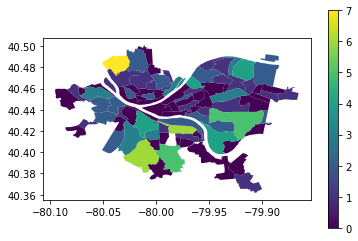

In [14]:
neighborhood["playfield"]=n_data["playfield"]
print(neighborhood["playfield"])
neighborhood.plot(column="playfield",legend=True)

,Neighborhood,Geometry,playfield
47,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",7
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",6
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",6
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",5
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",5
...,...,...,...
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",0
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",0
64,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",0
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",0


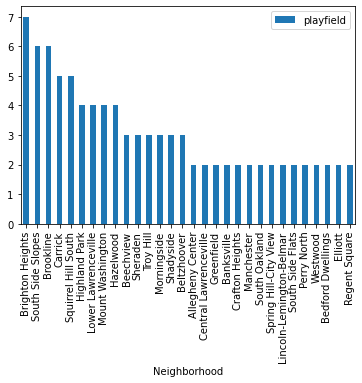

In [15]:
nb_pf=n_data.sort_values("playfield",ascending=False)
plt=nb_pf.iloc[:30].plot(kind='bar',x='Neighborhood',y='playfield')

nb_pf

### The combination of the metrics
Here is the code that provides weights to the different metrics and produces the true best neighborhood

In [21]:
data_lines = data_string.strip().split("\n")
keys = data_lines[0].split("\t")
playingfield_data = pd.read_csv('playfield.csv')

data_list = []
for line in data_lines[1:]:
    values = line.split("\t")
    data_dict = {}
    for i in range(len(keys)):
        data_dict[keys[i]] = values[i]
    data_list.append(data_dict)
    
# Convert the data_list into a Pandas DataFrame
education_data = pd.DataFrame(data_list, columns=keys)

# Merge police data with education data
merged_data = pd.merge(police_data, education_data, left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood')

# Calculate the average number of incidents per neighborhood
incidents_per_neighborhood = merged_data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='count')
incidents_per_neighborhood['count'] = incidents_per_neighborhood['count'] / merged_data['Neighborhood'].nunique()

# Define the weights for each column
gifted_weight = 0.4
iep_weight = 0.1
enrollment_weight = 0.0
incident_weight = 0.5
park_weight = 0.2


# Calculate the score for each neighborhood
education_data['score'] = (education_data['Gifted'].astype(int) * gifted_weight) + (education_data['Other IEP'].astype(int) * iep_weight) + (education_data['Total Enrollment K-12'].astype(int) * enrollment_weight) - (incidents_per_neighborhood['count'].astype(int) * incident_weight)

for index, row in education_data.iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in playingfield_data['neighborhood'].values:
        education_data.at[index, 'score'] += park_weight
        
# Sort neighborhoods by score
sorted_neighborhoods = education_data.sort_values(by='score', ascending=False)
sorted_neighborhoods = sorted_neighborhoods.dropna(subset=['score'], inplace=False)

# Print the top neighborhood
print("Based on the combined metric the best neighborhood is", sorted_neighborhoods.head(1)['Neighborhood'].values[0])

Based on the combined metric the best neighborhood is Brookline


## Conclusion
Data-driven determination of the best neighborhood is based on objective measures like crime rates, education quality, and other metrics that can be quantified and compared. The ranking of neighborhoods based on these measures we feel is pretty easy to miss peoples personal prefrences for certain neighborhoods. For example, the best neighborhood in terms of data may have a low crime rate and excellent schools, but it may lack the amenities or cultural scene that one is personally interested in. Alternatively, a neighborhood that ranks lower in data-driven rankings may be a personal favorite because it offers a sense of community or could be more visually appealing.

Lihan: According to my result, although Brookline is not the favorite one, it is still good enough with six playing fields. Brookline is at the second position of my results, it just has one less playing field than Brighton Heights (The first one). Also, the weight of my part is relatively lower than others. Hence, the result that "best neighborhood" is Brookline is accurate enough in my opinion.